# **TTI109 - Estatística**
# **Laboratório 05 - Estatística Descritiva 4**
# **Visualização de Dados**

Nessa aula vamos aprender a construir:

- Histograma
   - Frequência Absoluta
   - Frequência Relativa
- Polígono de Frequência
   - Frequência Absoluta
   - Frequência Relativa
- Ogiva ou Frequência Acumulada
- Pareto
- Setorial (circular) ou Pizza
- Dados Emparelhados
   - Dispersão
   - Séries Temporais
- Boxplot

# **Exercício: Análise de Vendas em uma Loja de Eletrônicos**

Uma loja de eletrônicos acompanhou suas vendas diárias ao longo de 30 dias. Além disso, a loja registrou o número de produtos vendidos por categoria (TVs, laptops, celulares, tablets) e os preços correspondentes. O objetivo é utilizar esses dados para criar diversos gráficos que permitam uma análise completa das vendas.

### **Dados Fornecidos**

**Vendas Diárias (número de unidades vendidas por dia durante 30 dias):**

```
[12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]
```

**Vendas por Categoria (número de unidades vendidas e preços por categoria):**

- TVs: 60 unidades, preço médio (em Reais) 2.000,00
- Laptops: 80 unidades, preço médio (em Reais) 3.500,00
- Celulares: 200 unidades, preço médio (em Reais) 1.200,00
- Tablets: 50 unidades, preço médio (em Reais) 1.800,00
- Datas de Vendas (para séries temporais): Dias 1 a 30 do mês

**Contrua os Gráficos:**

- **Histograma**
  - **Frequência:** Distribua as vendas diárias em intervalos (por exemplo, 5 intervalos) e crie um histograma para mostrar a frequência das vendas.
  - **Frequência Relativa:** Construa o mesmo histograma, mas com a frequência relativa (proporção das vendas).
- **Polígono de Frequência**
  - **Frequência:** Construa um polígono de frequência conectando os pontos médios das barras do histograma de frequência.
  - **Frequência Relativa:** Construa um polígono de frequência relativo conectando os pontos médios das barras do histograma de frequência relativa.
- **Ogiva ou Frequência Acumulada**
  - Construa uma ogiva utilizando as vendas diárias para mostrar a frequência acumulada.
- **Gráfico de Pareto**
  - Com base nas vendas por categoria, crie um gráfico de Pareto mostrando as unidades vendidas por categoria em ordem decrescente e a linha de frequência acumulada.
- **Gráfico Setorial (Pizza)**
  - Construa um gráfico de pizza para mostrar a participação de cada categoria no total de unidades vendidas.
- **Dados Emparelhados**
  - **Dispersão:** Relacione o número de unidades vendidas com o preço médio dos produtos e construa um gráfico de dispersão.
  - **Séries Temporais:** Construa um gráfico de linhas para mostrar as vendas ao longo dos 30 dias.
- **Boxplot**
  - Construa um boxplot das vendas diárias para analisar a distribuição, mediana e possíveis outliers.

### **Criação dos DafaFrames com os dados fornecidos**

In [9]:
# Criação dos DafaFrames com os dados fornecidos
import pandas as pd
import numpy as py 
import matplotlib.pyplot as plt
from math import sqrt
from math import ceil

dados = pd.Series(
    [12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]
)

### **Criando a tabela de frequências**

In [22]:
v_max = dados.max()
v_min = dados.min()
total = dados.count()
amp = v_max - v_min
qtde_classe = round(sqrt(total))
h = ceil(amp/qtde_classe)

freq = dados.value_counts(bins=qtde_classe).sort_index()

df = pd.DataFrame(freq)
df = df.reset_index()
df.columns = ["Classe", "Frequência"]

end_corrigido = v_min + h * qtde_classe
intervalo = pd.interval_range(start= v_min, end= end_corrigido, freq=h)
df["Classe"] = intervalo

pts_medios = []
for inter in intervalo:
    pts_medios.append(inter.mid)
df["Pontos médios"] = pts_medios

df["Frequência Relativa"] = df["Frequência"] / total

display(df)


,Classe,Frequência,Pontos médios,Frequência Relativa
0,"(9, 12]",4,10.5,0.133333
1,"(12, 15]",8,13.5,0.266667
2,"(15, 18]",7,16.5,0.233333
3,"(18, 21]",6,19.5,0.200000
4,"(21, 24]",5,22.5,0.166667


### **1 - Histograma  Frequência**

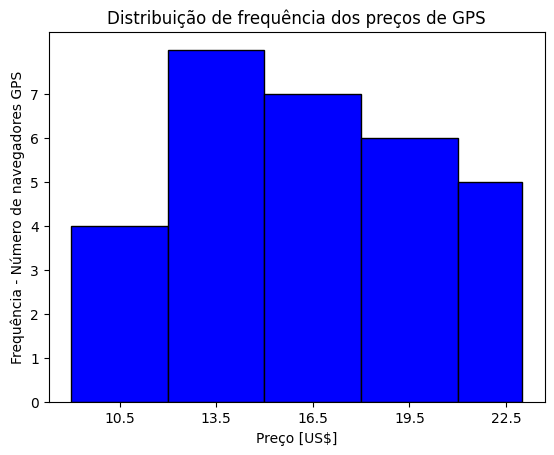

In [29]:
# 1. Histograma - Frequência
import matplotlib.pyplot as plt

classes = []

for inter in intervalo:
    classes.append(inter.left)

classes.append(v_max)

histograma = dados.hist(
    bins= classes,
    color= "blue",
    edgecolor= "black",
    grid= False
)

histograma.set(
    xlabel= "Preço [US$]",
    ylabel= "Frequência - Número de navegadores GPS",
    title= "Distribuição de frequência dos preços de GPS",
    xticks= df["Pontos médios"],
    yticks= range(0, df["Frequência"].max())
)

plt.show()

### **2. Histograma - Frequência Relativa**

[Text(0.5, 0, 'Preço [US$]'),
 Text(0, 0.5, 'Frequência Relativa - Número de navegadores GPS'),
 Text(0.5, 1.0, 'Frequência Relativa'),

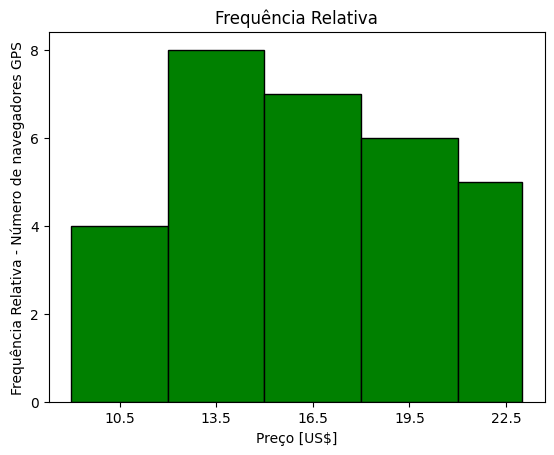

In [33]:
# 2. Histograma - Frequência Relativa
hist_freq_rela = dados.hist(
    bins= classes,
    color= "green",
    edgecolor= "black",
    grid= False
)

hist_freq_rela.set(
    xlabel= "Preço [US$]",
    ylabel= "Frequência Relativa - Número de navegadores GPS",
    title= "Frequência Relativa",
    xticks= df["Pontos médios"],
    yticks= range(0, df["Frequência"].max()+2,2)
)

### **3. Polígono de Frequência - Frequência**

In [ ]:
# 3. Polígono de Frequência - Frequência


### **4. Polígono de Frequência - Frequência Relativa**

In [ ]:
# 4. Polígono de Frequência - Frequência Relativa


### **5. Ogiva (Frequência Acumulada)**

In [ ]:
# 5. Ogiva (Frequência Acumulada)


### **6. Gráfico de Pareto**

In [ ]:
# 6. Gráfico de Pareto


### **7. Gráfico Setorial (Pizza)**

In [ ]:
# 7. Gráfico Setorial (Pizza)


### **8. Dados Emparelhados - Dispersão**

In [ ]:
# 8. Dados Emparelhados - Dispersão


### **9. Dados Emparelhados - Séries Temporais**

In [ ]:
# 9. Dados Emparelhados - Séries Temporais


### **10. Boxplot**

In [ ]:
# 10. Boxplot


# **EXTRA: Análise dos quartis de um painel de dados**

Um diagrama boxplot (ou caixa-e-bigode) é uma ferramenta de análise exploratória que destaca características importantes de um conjunto de dados.
Os dados utilizados no exercício anterior de uma Loja de Eletrônicos são simples, pois o intuitofoi deé aprender a utilizara ferramenta Python.
 Para expandir o uso de boxplots, vamos importar um grande conjunto de dados levantados a partir das gorjetas dadas por clientes de um restaurante.

O conjunto de dados possui os seguintes parâmetros:
- **valor_total:** valor total gasto no restaurante
- **gorjeta:** valor da gorjeta
- **sexo:** como o cliente pagante se identificou
- **fumante:** cliente fumante ou não
- **dia:** dia do atendimento
- **hora:** horário do atendimento
- **tamanho:** número de pessoas à mesa.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# Importação do conjunto de dados
gorjetas = pd.read_csv("gorjetas.csv")
print('5 primeiras linhas do conjunto de dados:')
display(gorjetas.head())

# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0,
                            interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)

# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0,
                              interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)

# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

### Boxplot - Painéis de dados

O uso do método boxplot() tem seu total potencial realizado quando os dados são um DataFrame.

Vamos checar a distribuição do valor das contas por dia de funcionamento do restaurante.

In [ ]:
gorjetas.boxplot(by='dia', column=['valor_total'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das contas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Agora, vamos examinar a distribuição das gorjetas por dia de funcionamento do restaurante

In [ ]:
gorjetas.boxplot(by='dia', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Distribuição das gorjetas agrupada por período de funcionamento

In [ ]:
gorjetas.boxplot(by='hora', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

### Também é possível agrupar a distribuição de gorjetas usando dois ou mais fatores.

Aqui, vamos agrupar por dia de funcionamento e como o cliente pagante se identificou

In [ ]:
gorjetas.boxplot(by=['dia', 'sexo'], column=['gorjeta'], color='red', showmeans=True, figsize=(12, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Rotacionar os textos do eixo x em 45 graus
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()